# Assignment 11: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Question 1 (10 Marks)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

In [2]:
df = pd.read_csv("age_height_data.csv")
df.head()


,age,height,true_cluster_label
0,37.0,4.961920,0
1,50.0,5.821349,2
2,45.0,5.531872,1
3,39.0,5.116280,0
4,68.0,5.168562,3


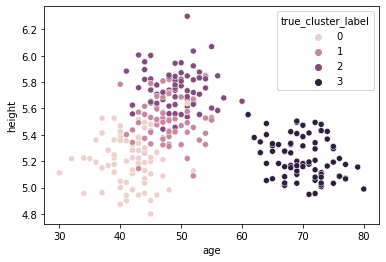

In [3]:
sns.scatterplot(x=df.age, y=df.height, hue=df.true_cluster_label)

## Question 2 (10 Marks)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

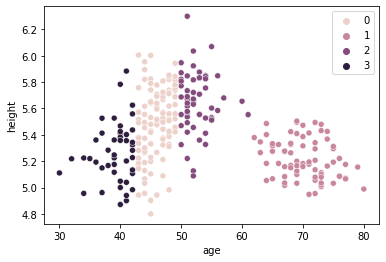

In [4]:
X = df.drop('true_cluster_label', axis='columns')
cl_pipe = Pipeline([('kmeancl', KMeans(n_clusters=4))])
cluster_labels = cl_pipe.fit_predict(X)
sns.scatterplot(x=df.age, y=df.height, hue=cluster_labels)


## Question 3 (10 Marks)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

This is not similar to the true cluster labels. This, like the hint suggests, is due to the difference in range of the age and height variables. Height varies from roughly 4.7 to 6.3, whereas age goes from 30 to 80. These scales are not comparable at all, as height's max is roughly 34% larger than its minimum, whereas age's max is 167% larger than its minimum. Should these values be clustered based on their scaled values, you will see decision lines that appear to be slanted, such as what is seen in the true clusters.

## Question 4 (10 Marks)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

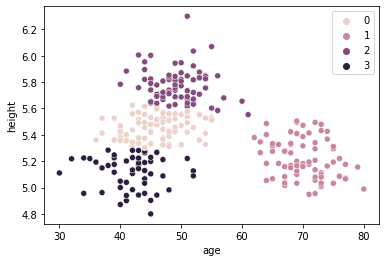

In [5]:
scaled_cl_pipe = Pipeline([('scaler', StandardScaler()), ('kmeancl', KMeans(n_clusters=4))])
scaled_cl_labels = scaled_cl_pipe.fit_predict(X)
sns.scatterplot(x=df.age, y=df.height, hue=scaled_cl_labels)

## Question 5 (10 Marks)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Hint: If you have a pipeline with a clustering step called `kmeans` in it, you can change the number of clusters, do a new fit, and get the score like so:

```
# Suppose clusters is desired number of clusters,
# and your pipeline is called kmn_pipe, which has
# a k-means step called kmeans:
kmn_pipe.named_steps['kmeans'].set_params(n_clusters = clusters)
kmn_pipe.fit(X)
newscore = (-kmn_pipe.score(X))
```

Create an elbow plot for this data.

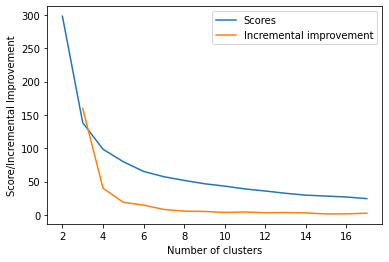

In [7]:
# Get number of rows
N = df.shape[0]
terminate = int(round(np.sqrt(N)))

# Create initial pipeline
scaled_cl_pipe = Pipeline([('scaler', StandardScaler()), ('kmeancl', KMeans(n_clusters=4))])
scores = np.zeros(terminate-1)


# Run through each value from 2 to sqrt(N)
for i in range(2, terminate+1):
    scaled_cl_pipe.named_steps['kmeancl'].set_params(n_clusters = i)
    scaled_cl_pipe.fit(X)

    # Record the score
    scores[i-2] = -scaled_cl_pipe.score(X)
    
    

# Plot scores
sns.lineplot(x=np.arange(2,terminate+1), y=scores, label="Scores")
sns.lineplot(x=np.arange(3,terminate+1), y=scores[:-1]-scores[1:], label = "Incremental improvement")
plt.xlabel("Number of clusters")
plt.ylabel("Score/Incremental Improvement")
plt.legend()

## Question 6 (10 Marks)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

The elbow for this plot appears to be around 4. This is because it appears to be an area in which the slope begins to become significantly flatter, and as such additional clusters lead to minimal improvements in the score.

## Question 7 (40 Marks)

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

3) Summarize the author's criticisms of the practitioner's approach to clustering.

4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

Answer here!

1) Ben-David believes that the transitivity in the first requirement of clustering--similar elements share the same cluster--contradicts the equivalence of the second requirement of clustering--that *all* elements within a cluster msut be similar. For example, take a set of elements {x, y, z} where y is "similar" to both x and z, but x and z are not similar with one another. The first requirement in clustering dictates y to be in the same cluster as x, and the same cluster as z. However, the second requirement in clustering dictates x and z must be in separate clusters.

2) The author's criticism to theoreticians is the fact that theoreticians focus too much on minute differences in algorithm performance for specific datasets. The author believes theoreticians would better serve others by explaining which applications their algorithm's would be more suitable, as this would greatly improve the usability of their work.

3) The author's main criticism to practitioners is the fact that they do not think critically about the specific clustering method used on their data. Rather than thinking about their data's needs, practitioners instead think about which alogrithms are most convenient to run.

4) As a practitioner, I will think about clustering algorithms based on the task I am trying to perform. Depending on the task, I will select an algorithm that is most appropriate to the needs of my task, tuning the algorithm's preference to balancing cluster size or cluster similarity.